# Descriptive Analysis
This notebook includes the descriptive analysis part of the <a href="https://orikatz.wordpress.com/2019/11/29/israel_clustering/">blog post</a>.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as mp
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import os

Loading data (both files can be found in the data folder of the project):

In [25]:
countries = pd.read_csv('data\\countries.csv')
maddison = pd.read_csv('data\\maddison.csv')

GDP per capita in 1950 - international comparison:

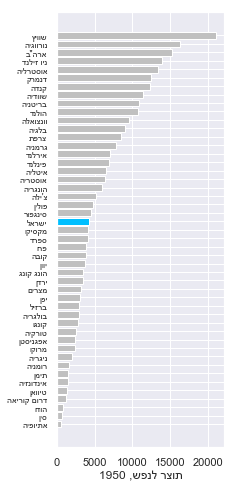

In [33]:
mddison_1950 = maddison[['1950', 'heb_name']].dropna(axis=0, how='any').sort_values(by=['1950']) 

mddison_1950['rheb_name'] = mddison_1950.loc[:,'heb_name'].apply(lambda x: x[::-1]) #reversing names to show them correctly
mddison_1950['color'] = np.where(mddison_1950['heb_name']== "ישראל", "deepskyblue", "silver")

y_pos = np.arange(len(mddison_1950['rheb_name']))

fig, ax = plt.subplots(figsize=(3,8))
rect = ax.barh(y_pos, mddison_1950['1950'], color = mddison_1950['color'])
xlabelheb = u'תוצר לנפש, 0591'
ax.set_xlabel(xlabelheb[::-1])
ax.set_yticks(np.arange(len(y_pos)))
ax.set_yticklabels(mddison_1950['rheb_name'], fontsize = 'x-small')
plt.close()
fig

Correlations table of the main variables:

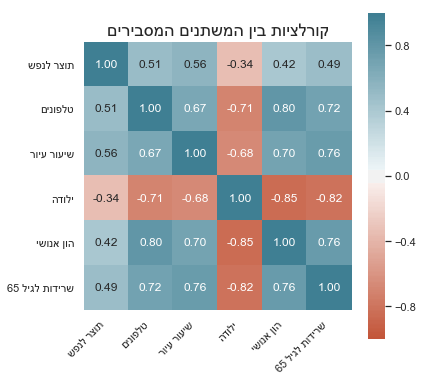

In [34]:
variables = countries[['gdppc_maddison', 'telephone', 'urban', 'fertility', 'hc', 'survival_65']].dropna(axis=0, how='any')                                                                            

corr = variables.corr()

names = [u'תוצר לנפש', u'טלפונים', u'שיעור עיור', u'ילודה', u'הון אנושי', u'שרידות לגיל 56']
namesr =  [x[::-1] for x in names] #reverese names

fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), 
            square=True, annot=True, fmt="03.2f")
ax.set_xticklabels(namesr)
ax.set_yticklabels(namesr)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,  horizontalalignment='right')
titleheb = u'קורלציות בין המשתנים המסבירים'
plt.title(titleheb[::-1], fontsize = 'x-large')
plt.close()
fig

Comparing interesting countries with line graphs:


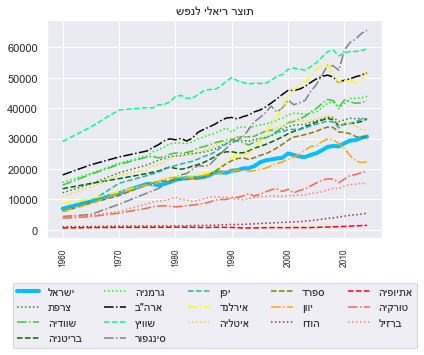

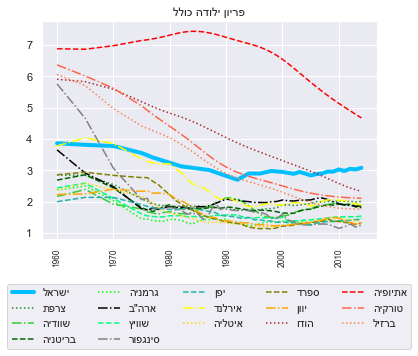

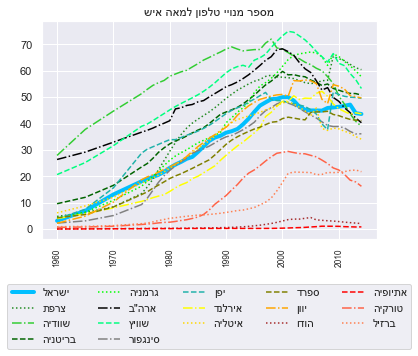

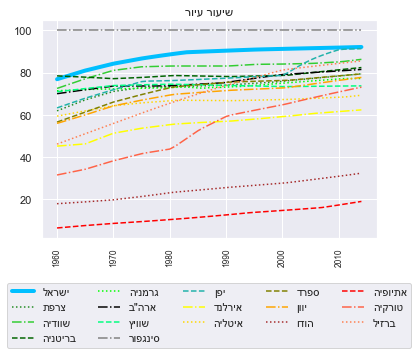

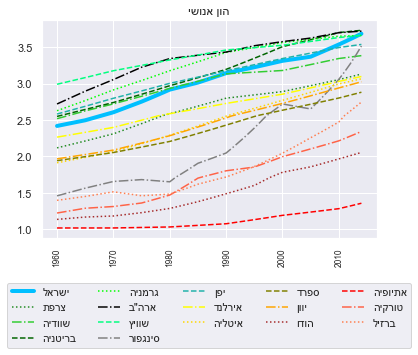

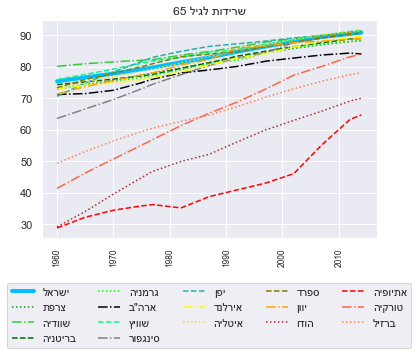

In [35]:
#reshaping the data:
countries3 = countries[['country_x', 'year_x', 'gdppc_maddison', 'fertility', 'telephone', 'urban', 'hc', 'survival_65']].dropna(axis=0, 
                      how='any').set_index('country_x').sort_values(by=['gdppc_maddison']).loc[['Israel', 'France','Sweden', 
                      'United Kingdom', 'Germany', 'United States', 'Switzerland', 'Singapore', 'Japan', 'Ireland', 'Italy', 
                      'Spain', 'Greece', 'India', 'Ethiopia', 'Turkey', 'Brazil']] 
countries3['country'] = countries3.index
                    
countries_reshape = countries3.pivot(index='year_x', columns='country', values=['gdppc_maddison', 'fertility', 'telephone', 
                                                                               'urban', 'hc', 'survival_65'])

countries_reshape['year'] = pd.to_numeric(countries_reshape.index)
    
heb_names = [u'ישראל', u'צרפת', u'שוודיה', u'בריטניה', u'גרמניה', u'ארה"ב', u'שוויץ', u'סינגפור', u'יפן', 
               u'אירלנד', u'איטליה', u'ספרד', u'יוון', u'הודו', u'אתיופיה', u'טורקיה', u'ברזיל']
               
heb_names2 = [] #reverse the hebrew lables to show them correctly
for i in heb_names: 
    heb_names2.append(i[::-1])   

variables = ['gdppc_maddison', 'fertility', 'telephone', 'urban', 'hc', 'survival_65']
names = [u'תוצר ריאלי לנפש', u'פריון ילודה כולל', u'מספר מנויי טלפון למאה איש', u'שיעור עיור', u'הון אנושי', u'שרידות לגיל 56']
namesr =  [x[::-1] for x in names] #reverese names

#creating charts: 
for variable, name in zip(variables, namesr): 

    plt.figure()
    plt.plot(countries_reshape['year'], countries_reshape[(variable, 'Israel')], lw = 4, color = 'deepskyblue')
    plt.plot(countries_reshape['year'], countries_reshape[(variable, 'France')], color = 'forestgreen', linestyle = ':')
    plt.plot(countries_reshape['year'], countries_reshape[(variable, 'Sweden')], color = 'limegreen', linestyle = '-.')
    plt.plot(countries_reshape['year'], countries_reshape[(variable, 'United Kingdom')], color = 'darkgreen', linestyle = '--')
    plt.plot(countries_reshape['year'], countries_reshape[(variable, 'Germany')], color = 'lime', linestyle = ':')
    plt.plot(countries_reshape['year'], countries_reshape[(variable, 'United States')], color = 'black', linestyle = '-.')
    plt.plot(countries_reshape['year'], countries_reshape[(variable, 'Switzerland')], color = 'springgreen', linestyle = '--')
    plt.plot(countries_reshape['year'], countries_reshape[(variable, 'Singapore')], color = 'grey', linestyle = '-.')
    plt.plot(countries_reshape['year'], countries_reshape[(variable, 'Japan')], color = 'lightseagreen', linestyle = '--')
    plt.plot(countries_reshape['year'], countries_reshape[(variable, 'Ireland')], color = 'yellow', linestyle = '-.')  
    plt.plot(countries_reshape['year'], countries_reshape[(variable, 'Italy')], color = 'gold', linestyle = ':')  
    plt.plot(countries_reshape['year'], countries_reshape[(variable, 'Spain')], color = 'olive', linestyle = '--')  
    plt.plot(countries_reshape['year'], countries_reshape[(variable, 'Greece')], color = 'orange', linestyle = '-.')  
    plt.plot(countries_reshape['year'], countries_reshape[(variable, 'India')], color = 'brown', linestyle = ':')  
    plt.plot(countries_reshape['year'], countries_reshape[(variable, 'Ethiopia')], color = 'red', linestyle = '--')  
    plt.plot(countries_reshape['year'], countries_reshape[(variable, 'Turkey')], color = 'tomato', linestyle = '-.')  
    plt.plot(countries_reshape['year'], countries_reshape[(variable, 'Brazil')], color = 'coral', linestyle = ':')  

    plt.xticks(rotation='vertical', fontsize = 'x-small')  
    leg = plt.legend(labels = heb_names2, bbox_to_anchor=(0.5, -0.18), loc='upper center', ncol=5)
    plt.title(name)
    